In [6]:
import pandas as pd
import seaborn as sns

In [4]:
## Dataset

!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
data = pd.read_csv("housing.csv")


--2022-09-18 19:35:55--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

housing.csv         100%[===================>]   1.36M  4.24MB/s    in 0.3s    

2022-09-18 19:35:56 (4.24 MB/s) - 'housing.csv' saved [1423529/1423529]



In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [46]:
median_house_value = data.median_house_value
median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

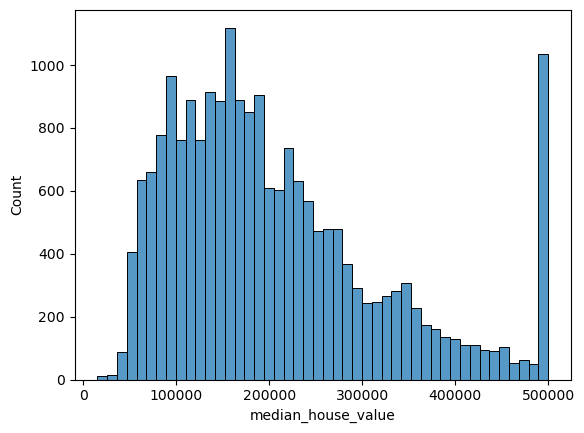

In [8]:
sns.histplot(median_house_value)

In [ ]:
# No long tail.

In [9]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
data = data[columns]

# Question 1

In [207]:
data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

# Question 2

In [14]:
population_median = data.population.median()
population_median

1166.0

# Split data

In [208]:
import numpy as np

np.random.seed(42)
data_len = data.shape[0]

idx = np.arange(data_len)
np.random.shuffle(idx)

In [209]:
train_set_len = int(data_len*0.6)
val_test_set_len = int(data_len*0.2)
assert train_set_len + val_test_set_len*2  == data_len

In [210]:
train_set_len, val_test_set_len

(12384, 4128)

In [211]:
df_train = data.iloc[idx[:train_set_len]]
df_val = data.iloc[idx[train_set_len:val_test_set_len+train_set_len]]
df_test = data.iloc[idx[val_test_set_len+train_set_len:]]

In [214]:
y = np.log1p(y)

In [215]:
y

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [216]:
y_train = y.iloc[idx[:train_set_len]]
y_val = y.iloc[idx[train_set_len:val_test_set_len+train_set_len]]
y_test = y.iloc[idx[val_test_set_len+train_set_len:]]

In [217]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [218]:
y_train.head()

20046    10.772708
3024     10.732061
15663    13.122367
20484    12.295003
9814     12.535380
Name: median_house_value, dtype: float64

# Question 3

In [244]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse).round(2)

In [80]:
def prepare_data(X, columns = None, fill = 0):
    if column:
        X[columns] = X[columns].fillna(fill)
    else:
        X = X.fillna(fill)
    X = X.values
    return X

In [129]:
def train_linear_regression_model(X, y, r = None):
    ones =np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    if r:
        reg = r * np.eye(XTX.shape[0])
        XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
    

In [143]:
def evaluate_model(X_train, y_train, X_val, y_val, r = None, fill = 0, empty_columns = None):
    X_train = prepare_data(X_train, empty_columns, fill = fill)
    w0, w = train_linear_regression_model(X_train, y_train, r)
    print(f'bias: {w0},\n weights: {w}')
    X_val = prepare_data(X_val, empty_columns, fill = fill)
    y_pred = w0 + X_val.dot(w)
    return rmse(y_val, y_pred)

In [219]:
X_train = df_train.copy()
X_val = df_val.copy()

In [220]:
X_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [221]:
rmse_zero = evaluate_model(X_train, y_train, X_val, y_val, r = None, fill = 0, empty_columns = ['total_bedrooms'])

bias: -11.686975241713947,
 weights: [-2.82087184e-01 -2.76255120e-01  2.91329621e-03 -8.64531514e-06
  1.50811922e-04 -2.08205659e-04  5.69546573e-04  1.71308139e-01]


In [222]:
X_train = df_train.copy()
X_val = df_val.copy()

In [223]:
X_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [224]:
mean_total_bedrooms = X_train['total_bedrooms'].mean()

rmse_mean = evaluate_model(X_train, y_train, X_val, y_val, r = None, fill = mean_total_bedrooms, empty_columns = ['total_bedrooms'])

bias: -11.75959087216739,
 weights: [-2.82182103e-01 -2.76809637e-01  2.93033801e-03 -1.48543785e-05
  2.48054046e-04 -2.03763456e-04  4.87004092e-04  1.73086593e-01]


In [225]:
rmse_mean

0.33

In [226]:
rmse_zero

0.33

Answer: Equally good. 

# Question 4

In [227]:
X_train = df_train.copy()
X_val = df_val.copy()

In [228]:
X_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [229]:
r_options = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [230]:
results = {}

for r in r_options:
    results[r] = evaluate_model(X_train, y_train, X_val, y_val, r = r, fill = 0, empty_columns = ['total_bedrooms'])
    
    

bias: -11.686975241713947,
 weights: [-2.82087184e-01 -2.76255120e-01  2.91329621e-03 -8.64531514e-06
  1.50811922e-04 -2.08205659e-04  5.69546573e-04  1.71308139e-01]
bias: -11.686959175536991,
 weights: [-2.82087030e-01 -2.76254938e-01  2.91329904e-03 -8.64535104e-06
  1.50811874e-04 -2.08205662e-04  5.69546853e-04  1.71308163e-01]
bias: -11.68536886572831,
 weights: [-2.82071863e-01 -2.76236960e-01  2.91357892e-03 -8.64890458e-06
  1.50807091e-04 -2.08205964e-04  5.69574487e-04  1.71310631e-01]
bias: -11.670931317955688,
 weights: [-2.81934164e-01 -2.76073747e-01  2.91611982e-03 -8.68116523e-06
  1.50763669e-04 -2.08208710e-04  5.69825364e-04  1.71333037e-01]
bias: -11.52849358570942,
 weights: [-2.80575653e-01 -2.74463519e-01  2.94118780e-03 -8.99944134e-06
  1.50335271e-04 -2.08235797e-04  5.72300466e-04  1.71554081e-01]
bias: -10.274500282064437,
 weights: [-2.68615534e-01 -2.60287379e-01  3.16188191e-03 -1.18014337e-05
  1.46563566e-04 -2.08474264e-04  5.94090735e-04  1.73500060

In [231]:
results

{0: 0.33,
 1e-06: 0.33,
 0.0001: 0.33,
 0.001: 0.33,
 0.01: 0.33,
 0.1: 0.33,
 1: 0.33,
 5: 0.34,
 10: 0.34}

# Question 5

In [232]:
seed_options = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [233]:
data_len = data.shape[0]
train_set_len = int(data_len*0.6)
val_test_set_len = int(data_len*0.2)

scores = []

for seed in seed_options:
    np.random.seed(seed)

    idx = np.arange(data_len)
    np.random.shuffle(idx)
    
    X_train = data.iloc[idx[:train_set_len]]
    X_val = data.iloc[idx[train_set_len:val_test_set_len+train_set_len]]
    X_test = data.iloc[idx[val_test_set_len+train_set_len:]]
    
    y_train = y.iloc[idx[:train_set_len]]
    y_val = y.iloc[idx[train_set_len:val_test_set_len+train_set_len]]
    y_test = y.iloc[idx[val_test_set_len+train_set_len:]]
    
    scores.append(evaluate_model(X_train, y_train, X_val, y_val, r = None, fill = 0, empty_columns = ['total_bedrooms']))
    

bias: -11.900382139443316,
 weights: [-2.83587925e-01 -2.78474139e-01  2.83363465e-03 -1.39546125e-05
  2.08700923e-04 -2.03244946e-04  5.31397032e-04  1.71064667e-01]
bias: -11.732757373641356,
 weights: [-2.81066601e-01 -2.76080690e-01  3.27325341e-03 -2.12164361e-05
  2.58696429e-04 -1.70730849e-04  4.39101611e-04  1.72814119e-01]
bias: -11.806729361482809,
 weights: [-2.80146215e-01 -2.76488987e-01  3.24730928e-03 -2.35489274e-05
  2.70655686e-04 -1.68484740e-04  4.20303018e-04  1.72584448e-01]
bias: -11.58790034854829,
 weights: [-2.78281924e-01 -2.74072566e-01  3.02426258e-03 -2.00647295e-05
  2.74030518e-04 -1.67519497e-04  4.09883474e-04  1.73607061e-01]
bias: -11.38947058893136,
 weights: [-2.76721574e-01 -2.71948129e-01  3.21255726e-03 -1.87041135e-05
  1.98346975e-04 -1.61822587e-04  4.53890175e-04  1.74005574e-01]
bias: -11.447114276367895,
 weights: [-2.77082677e-01 -2.72345140e-01  3.51861123e-03 -2.25827635e-05
  2.10627546e-04 -1.70006919e-04  4.99355860e-04  1.75625429

/var/folders/3r/_mc3xcfj2hs9f950xsb3t44w0000gn/T/ipykernel_51718/1248812977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna(fill)
/var/folders/3r/_mc3xcfj2hs9f950xsb3t44w0000gn/T/ipykernel_51718/1248812977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna(fill)
/var/folders/3r/_mc3xcfj2hs9f950xsb3t44w0000gn/T/ipykernel_51718/1248812977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [234]:
scores

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [235]:
round(np.std(scores), 3)

0.005

# Question 6

In [236]:
np.random.seed(9)

idx = np.arange(data_len)
np.random.shuffle(idx)
    
X_train = data.iloc[idx[:train_set_len]]
X_val = data.iloc[idx[train_set_len:val_test_set_len+train_set_len]]
X_test = data.iloc[idx[val_test_set_len+train_set_len:]]
    
y_train = y.iloc[idx[:train_set_len]]
y_val = y.iloc[idx[train_set_len:val_test_set_len+train_set_len]]
y_test = y.iloc[idx[val_test_set_len+train_set_len:]]

In [237]:
train_data = pd.concat([X_train, X_val])
target_data = pd.concat([y_train, y_test]).values

In [246]:
train_data.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [239]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [251]:
train_data = train_data.fillna(0)
X_test = X_test.fillna(0)

In [252]:
evaluate_model(train_data, target_data, X_test, y_test, r = 0.001, fill = 0, empty_columns = ['total_bedrooms'])


bias: -5.990469041919493,
 weights: [-2.09227009e-01 -2.08322984e-01  2.23250710e-03 -1.92682154e-05
  1.85857781e-04 -1.22330155e-04  3.31001478e-04  1.33335255e-01]


0.36